In [8]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil #to copy one folder to other
import glob #for pattern matching

In [9]:
import os

# Set the KAGGLE_USERNAME and KAGGLE_KEY environment variables
os.environ["KAGGLE_USERNAME"] = "shwe12"
os.environ["KAGGLE_KEY"] = "2a64acd6b6fdeb6b23f6cd28f32cd027"

# Import the kaggle library
import kaggle

# Authenticate to the Kaggle API
kaggle.api.authenticate()

In [10]:
# Download the dataset from Kaggle
#dataset_slug = "amitabhajoy/bengaluru-house-price-data/Bengaluru_House_Data.csv"
#df = kaggle.api.dataset_download_files(dataset_slug)


In [12]:
import pandas as pd
df=pd.read_csv('Bengaluru_House_Data.csv')

In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
df.shape

(13320, 9)

In [15]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [16]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [17]:
#drop features that are not required to build our model(based on assumption)
df2=df.drop(['area_type','availability','society','balcony'],axis='columns')

In [18]:
#Data Cleaning: Handle NA values

In [19]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [20]:
# drop those values since dataset huge it wont make any diffrence in droping small count otherwise take medien value and replace
df3=df2.dropna()

In [21]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
#FEATURE ENGINEERING(Add new feature(integer) for bhk)

In [23]:
#in size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
#tokenize the string
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

In [25]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [27]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [28]:
#here there is anamoly where for 2400 sqft 43 bedrooms is not possible so we need to look into it


In [29]:
#total_sqft column explore
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
#'1133-1384 in total sqft need to be changed similar to this whtever is present we need change

In [31]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [32]:
df3[~df3['total_sqft'].apply(is_float)].head(10)#~nigate operation-to filter partculat column

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [33]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [34]:
df4=df3.copy()

In [35]:
df4.total_sqft=df4.total_sqft.apply(convert_sqft_to_num)

In [36]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [37]:
#outlier detection and removal
#we have seen 43 bhk  build in 2400 sqft area and anamoly is between size and these are outliers need to be corrected

In [38]:
df4.shape

(13246, 6)

In [39]:
df4.total_sqft[4683]/df4.bhk[4683] #this one is 43 bhk data built in 2400 sqft

222.22222222222223

In [40]:
df4[df4.total_sqft/df4.bhk<300].head(5)


,location,size,total_sqft,bath,price,bhk
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8
70,Double Road,3 Bedroom,500.0,3.0,100.0,3


In [41]:
df5=df4[~(df4.total_sqft/df4.bhk<300)] #nigate operation filtering out thing total_sqt/bhk which is less than 300 we are filtering out
#this is one way of removing outliers

In [42]:
df5.shape

(12502, 6)

In [43]:
#a=13246-12502=744 almost 744 datas removed


In [44]:
#feature engineering add new feature price per sqft (original price column contain value in lakhs)
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [45]:
#we have more outliers check price per sq wheter to high or too low we can check
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
#min value is 267 rs per sqft max is 176470 which is extreme maximum, possible in some generic area but for out model we can remove this with extreme variation

In [47]:
#write function to remove data which lie in extreme variation using mean and std deviation

#if our dataset  has a normal distribution like we assume that out dataset have normal distribution then
#then most of data point around 68% should lie between mean and 1 std deviation

In [48]:
#we need to do for each location because price depends on the location too some area have less price some have high

In [49]:
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [50]:
df6=remove_pps_outliers(df5)
df6.shape #we removed more than 2000 datas from our dataset

(9259, 7)

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [51]:
#one more thing to check in dataset property value for 2bhk high than 3bhk or based on sqft how it varies its considerable or not

In [107]:
df6.location = df6.location.apply(lambda x: x.strip())
location_stats = df6['location'].value_counts(ascending=False)
location_stats

Whitefield           478
Sarjapur  Road       296
Electronic City      278
Kanakpura Road       190
Yelahanka            169
                    ... 
Manjunatha Layout      1
Mangammanapalya        1
Shirdi Sai Layout      1
Hallehalli             1
Kashi Nagar            1
Name: location, Length: 761, dtype: int64

In [108]:
location_stats.values.sum()

9259

In [109]:
len(location_stats[location_stats>10])

180

In [110]:
len(location_stats)

761

In [111]:
len(location_stats[location_stats<=10])

581

Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [113]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Doddakallasandra     10
Prithvi Layout       10
Yelenahalli          10
Sarakki Nagar        10
Rajiv Nagar          10
                     ..
Manjunatha Layout     1
Mangammanapalya       1
Shirdi Sai Layout     1
Hallehalli            1
Kashi Nagar           1
Name: location, Length: 581, dtype: int64

In [114]:
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

181

In [115]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

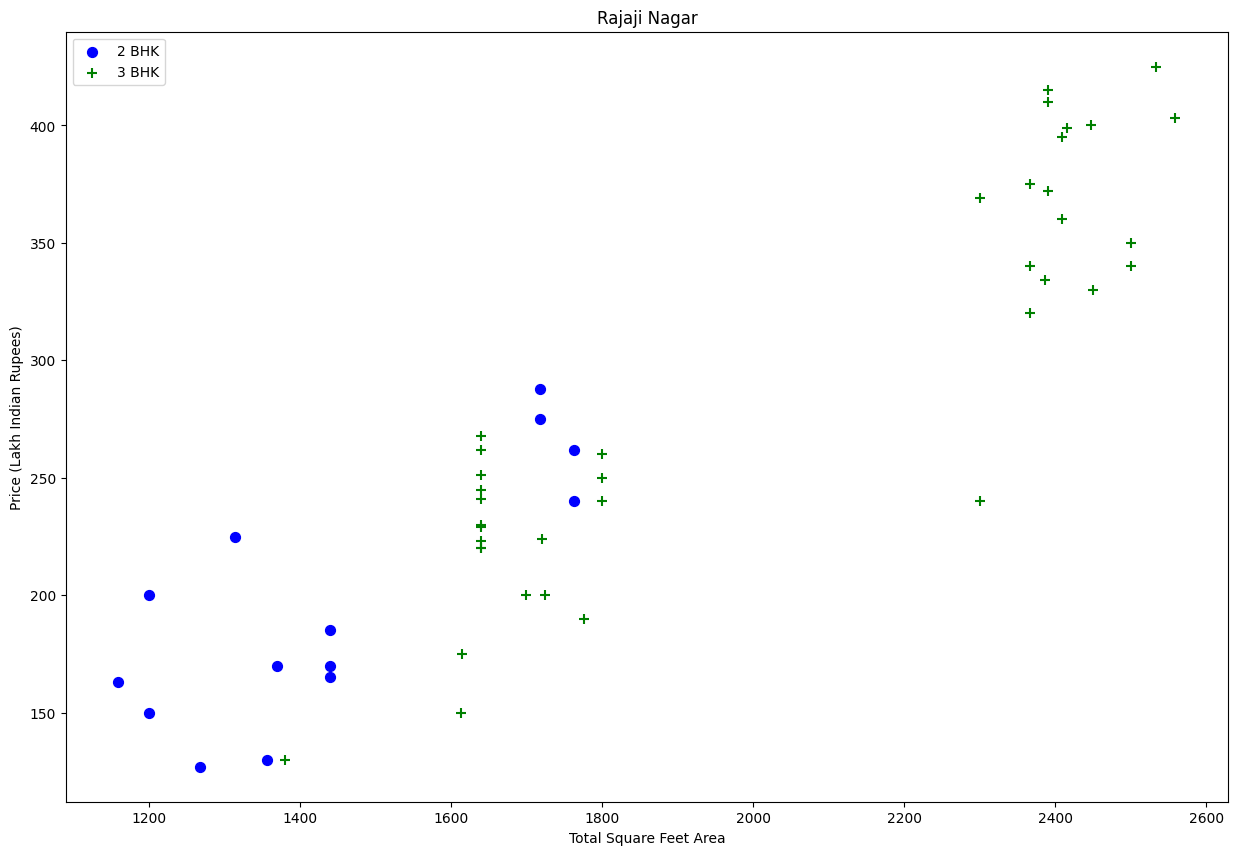

In [116]:
#this can be due to many reason it may be based on lacation we use scatter pot to know this
#draw scatter plot which take location and df as input
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,'Rajaji Nagar')

In [117]:
#around 17500 sqft area 2bhk price is more than 3bhk we need to data clean up for this kind

In [118]:
'''
We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
'''

"\nWe should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.\n\n{\n    '1' : {\n        'mean': 4000,\n        'std: 2000,\n        'count': 34\n    },\n    '2' : {\n        'mean': 4300,\n        'std: 2300,\n        'count': 22\n    },    \n}\n\nNow we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment\n"

In [119]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): #going to each location df
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'): #for each location i am creating new df based on bhk
            bhk_stats[bhk] = { #for per bhk computing mean std count
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5: #excluding data which have nean less for previous
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [120]:
df7 = remove_bhk_outliers(df6)

df7.shape

(6514, 7)

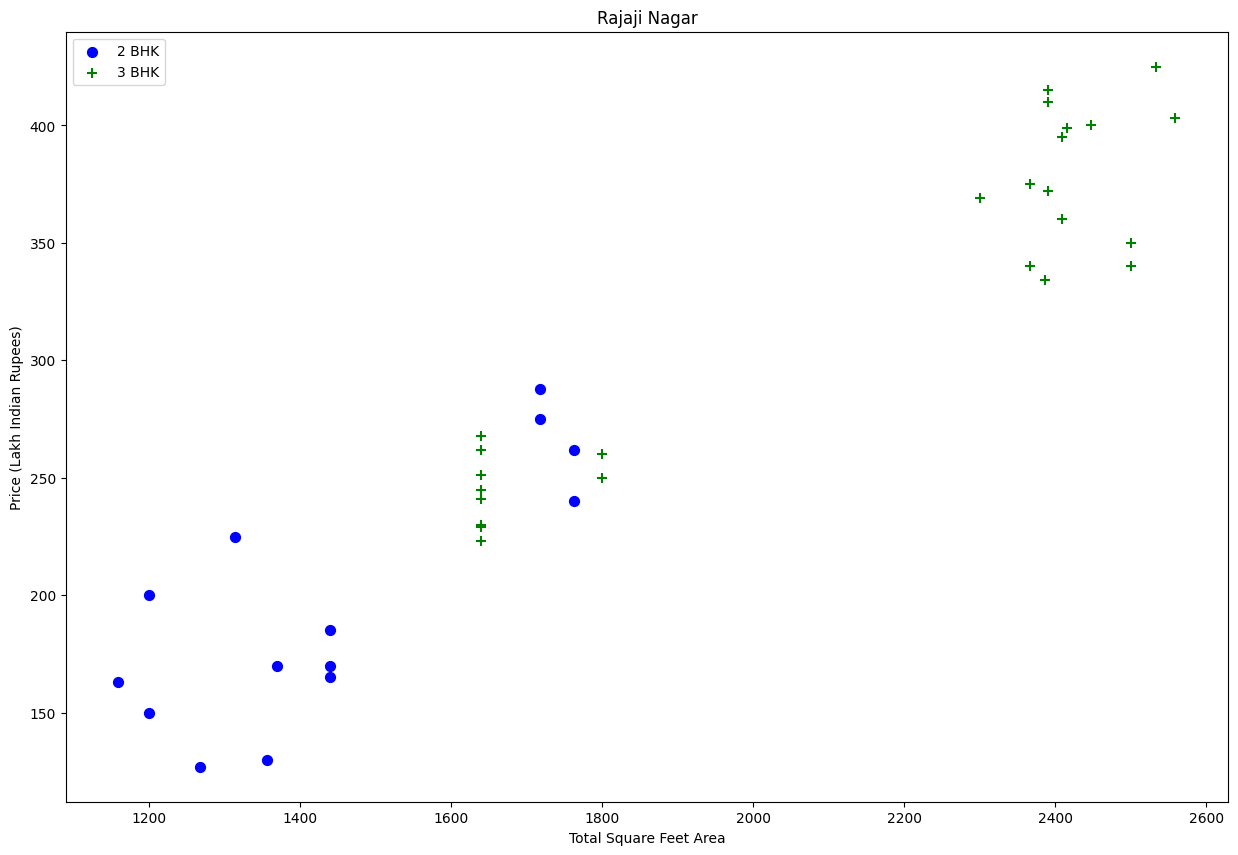

In [121]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [122]:
#some how it is fine than previous

Text(0, 0.5, 'Count')

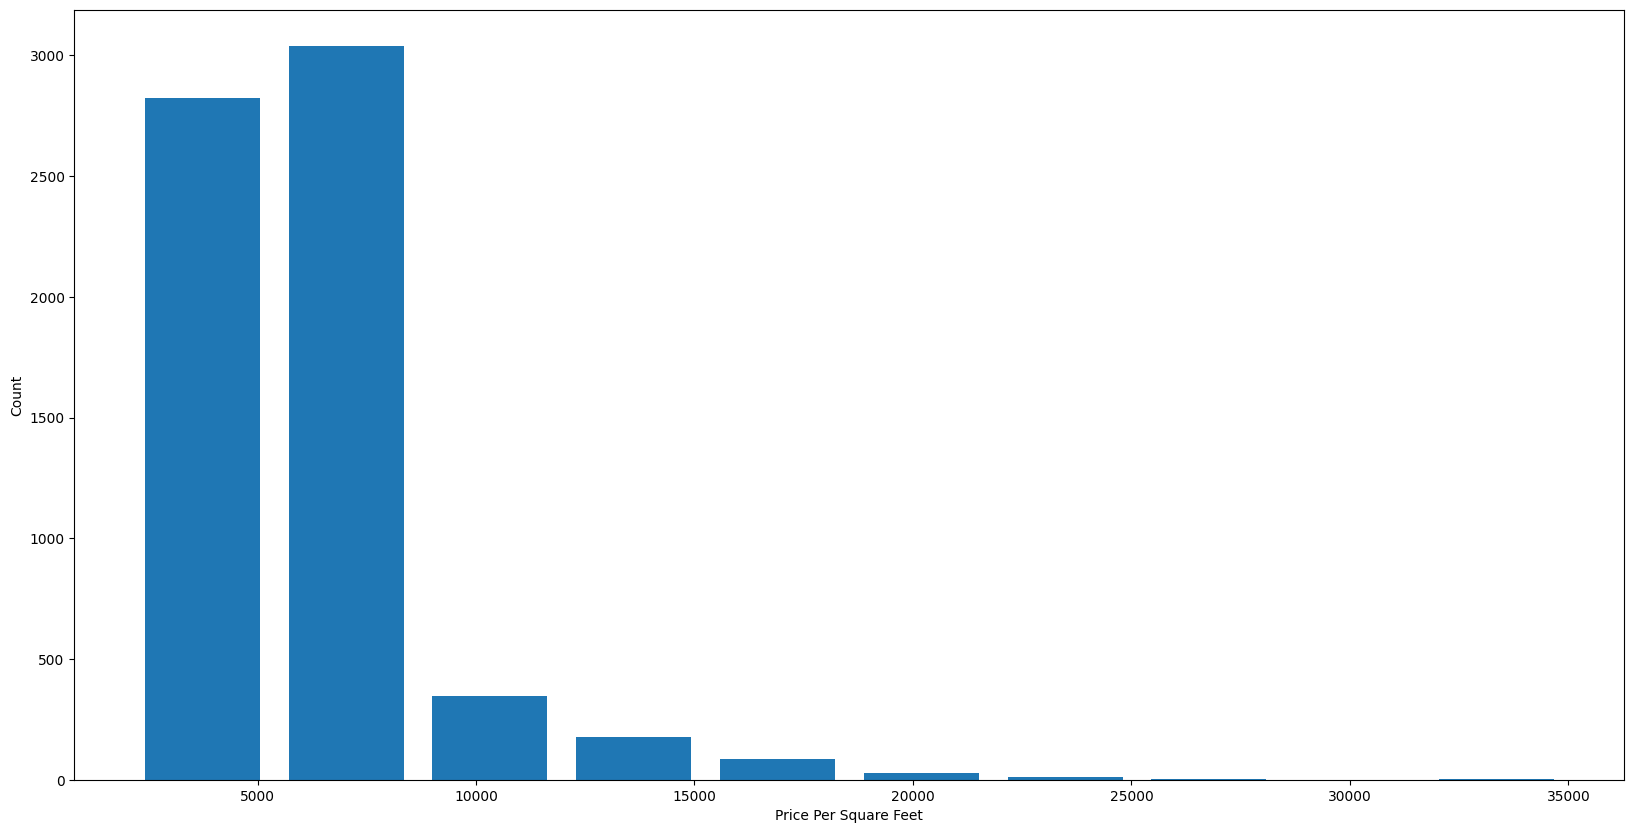

In [123]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [124]:
#exploring bathroom features:some of these with high sqft can have max number but if it is more than bedroom we need to remove
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
779,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6181,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'Count')

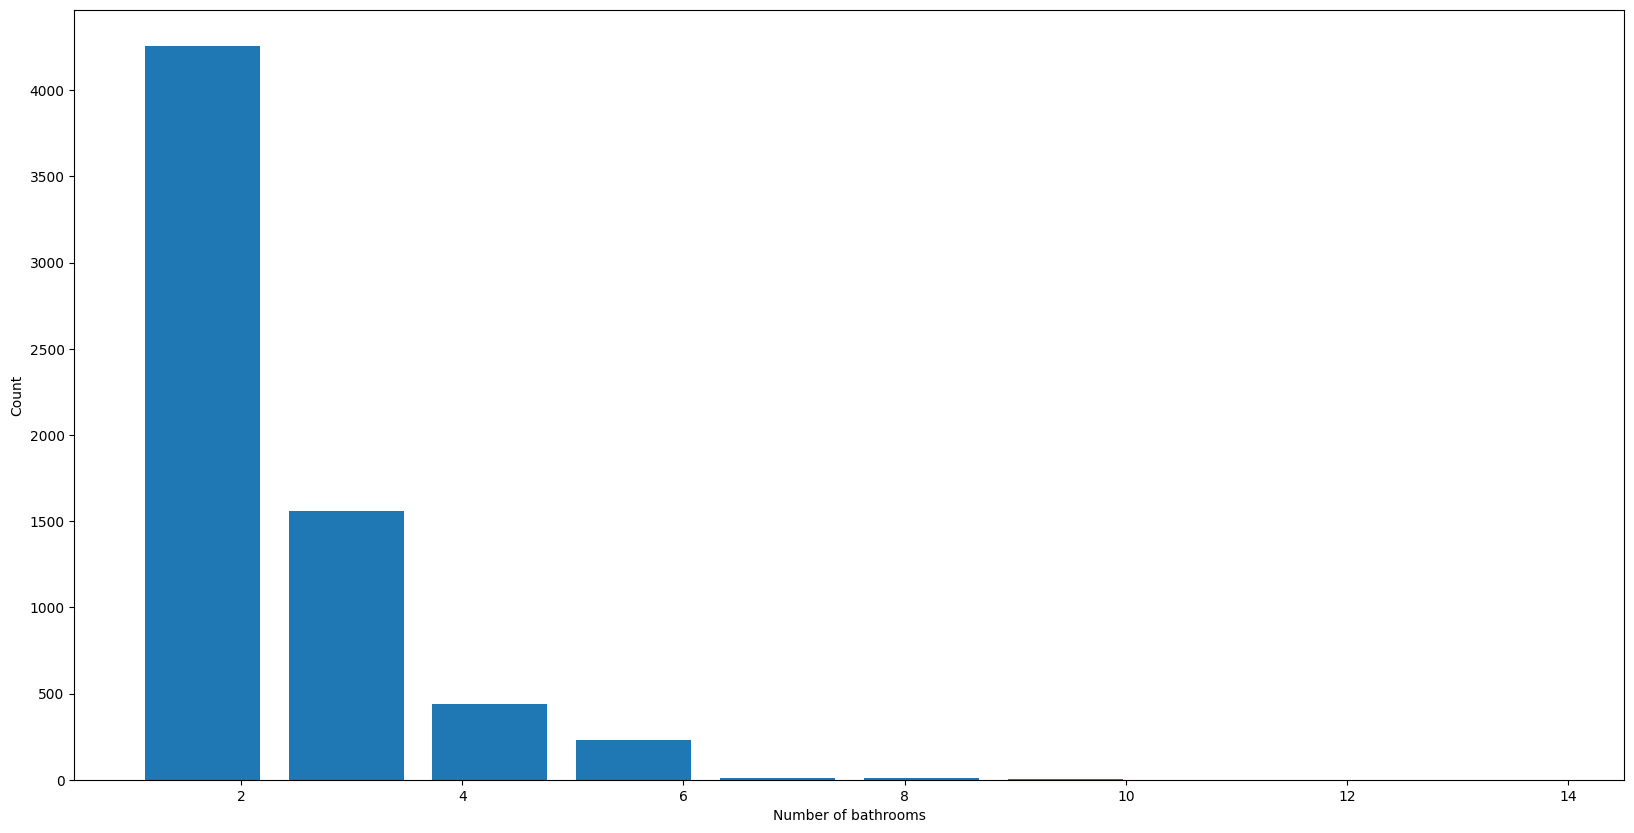

In [125]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [126]:
#most datas have 2-8 bathrooms remaining are outliers

In [127]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
779,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
7908,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [128]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(6437, 7)

In [129]:
#start preparing for ml training now drop unnecssary features
df9=df8.drop(['size','price_per_sqft'],axis='columns')
df9.shape

(6437, 5)

In [130]:
df9.head()

,location,total_sqft,bath,price,bhk
0,other,1672.0,3.0,150.0,3
1,other,1750.0,3.0,149.0,3
2,other,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


In [131]:
#text column to one hot encoding
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [141]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,other,1672.0,3.0,150.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,other,1750.0,3.0,149.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,1750.0,3.0,150.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df10.head(5)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,other,1672.0,3.0,150.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,other,1750.0,3.0,149.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,1750.0,3.0,150.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1672.0,3.0,150.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#this is data processing pipeline from df to df10 each steps we have done

In [145]:
#MODEL BUILDING

In [146]:
#dependent and independent variable
X=df11.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1672.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
y=df11.price
y.head()

0    150.0
1    149.0
2    150.0
4     40.0
5     83.0
Name: price, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [149]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test) #HOW GOOD OUR MODEL IS GIVEN BY SCORE

0.8150801402128076

In [158]:
lr_clf.get_params().keys()


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [161]:
lr_clf.get_params().values()

dict_values([True, True, None, False])

If you are getting a negative score in linear regression, you should try to identify the cause of the problem and take steps to improve the model. Here are a few things you can try:

Remove any outliers from the data.
Use a regularization technique to prevent overfitting.
Add additional features to the model.
Try using a different function to fit the data, such as a polynomial or non-linear function.If you are still having trouble getting a good score, you may want to try a different machine learning algorithm, such as decision trees or random forests.

In [150]:
#81.5% is preety good we can also try other models


In [151]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model

In [152]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81093291, 0.77307361, 0.6682668 , 0.81150885, 0.66350379])

We can see that in 5 iterations we get a score above 60% . This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [162]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
                'copy_X':[True,False],
                'fit_intercept':[True,False],
                'n_jobs':[True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)

        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.745817,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.660530,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.738720,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [163]:
#linear regression gives best score and decision tree next max

In [173]:
#Test the model for few properties

In [164]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [169]:
predict_price('Neeladri Nagar',4000, 12, 10) #in dataset it is given 450

301.05204539689515

In [172]:
predict_price('Devarachikkanahalli',1250, 2, 2) #in dataset it is given price is 40

56.584058403333344

In [174]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

79.33763350047018

In [175]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

71.9415417151248

In [176]:
predict_price('Indira Nagar',1000, 2, 2)

149.78774936491283

In [177]:
predict_price('Indira Nagar',1000, 3, 3)

142.39165757956744

In [178]:
#above four predicted the price

In [179]:
#Export the tested model to a pickle file

In [180]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [181]:
#other than model we need column information so converting to json and used,pickle file and json are used for python flask model

In [182]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))